In [125]:
import pandas as pd 
import numpy as np
import nltk 
import matplotlib.pyplot as plt

In [126]:
from nltk import sent_tokenize,word_tokenize

In [127]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

Reading the CSV File

In [128]:
pd.set_option('display.max_colwidth', None)
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

We are showing first 20 data and our dataset has 31962 tweets

In [129]:
Data.head(20)
#len(Data)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


We have checked the total no. of data which has no tweets and See Each and every rows and column has information

In [130]:
Data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

Let's take an initial look at frequency distribution. We can see that there is quite a bit of punctuation and words that are not useful ('the', 'to', etc...)

[('#', 76675), ('@', 18212), ('user', 17577), ('!', 14650), ('.', 12380), ('the', 10145), ('to', 9832), ('i', 7144), ('a', 6444), (',', 6305)]


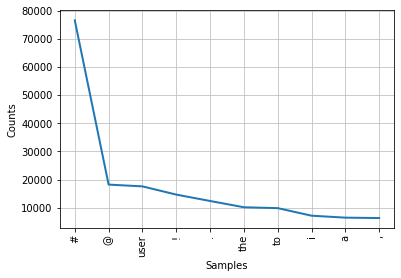

In [131]:
#Import required libraries :
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

#Get a list of words
text=(" ").join(Data.iloc[:,2].values)

text = word_tokenize(text)

#Find the frequency :
fdist = FreqDist(text)

#Print 10 most common words :
print(fdist.most_common(10))


fdist.plot(10)

Setting the 3rd column of dataset as feature

In [132]:
features=Data.iloc[:,2].values

features

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       'listening to sad songs on a monday morning otw to work is sad  ',
       '@user #sikh #temple vandalised in in #calgary, #wso condemns  act  ',
       'thank you @user for you follow  '], dtype=object)

Setting the 2nd column of dataset as label

In [133]:
labela=Data.iloc[:,1].values

labela

array([0, 0, 0, ..., 0, 1, 0])

Now we will start cleaning and processing our data

Lets start by deleting @user

In [134]:
import string
import re
for i in range(len(features)):
  features[i]=features[i].replace("@user","")

features

array(['  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       'listening to sad songs on a monday morning otw to work is sad  ',
       ' #sikh #temple vandalised in in #calgary, #wso condemns  act  ',
       'thank you  for you follow  '], dtype=object)

Now we will try to clean the punctuations


In [135]:
for i in range(len(features)):
  features[i]=features[i].translate(str.maketrans('','',string.punctuation))

We will remove the stop words as well as any words that contain numbers. We can do this by first tokenizing the word and then iterating through the tweets

In [136]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words("english")
from nltk.tokenize import word_tokenize

feature_tokens = []

for tweet in features:
  tweet_tokens = word_tokenize(tweet)
  this_sent = []
  for word in tweet_tokens:
    if word not in stopwords and word.isalpha():
      this_sent.append(word)
  feature_tokens.append(this_sent)
  
feature_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run'],
 ['thanks',
  'lyft',
  'credit',
  'cant',
  'use',
  'cause',
  'dont',
  'offer',
  'wheelchair',
  'vans',
  'pdx',
  'disapointed',
  'getthanked'],
 ['bihday', 'majesty'],
 ['model', 'love', 'u', 'take', 'u', 'time'],
 ['factsguide', 'society', 'motivation'],
 ['huge',
  'fan',
  'fare',
  'big',
  'talking',
  'leave',
  'chaos',
  'pay',
  'disputes',
  'get',
  'allshowandnogo'],
 ['camping', 'tomorrow'],
 ['next',
  'school',
  'year',
  'year',
  'cant',
  'think',
  'school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['love',
  'land',
  'allin',
  'cavs',
  'champions',
  'cleveland',
  'clevelandcavaliers'],
 ['welcome', 'im'],
 ['ireland',
  'consumer',
  'price',
  'index',
  'mom',
  'climbed',
  'previous',
  'may',
  'blog',
  'silver',
  'gold',
  'forex'],
 ['selfish',
  'orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  

We want to make sure the words are in their base form. We can do this by using a WordNet Lemmatizer

In [137]:
from nltk import WordNetLemmatizer

lemma = WordNetLemmatizer()

lemma_features = []
for tweet in feature_tokens:
  this_tweet=[]
  for word in tweet:
    this_tweet.append(lemma.lemmatize(word))
  lemma_features.append(this_tweet)
  
lemma_features

[['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction', 'run'],
 ['thanks',
  'lyft',
  'credit',
  'cant',
  'use',
  'cause',
  'dont',
  'offer',
  'wheelchair',
  'van',
  'pdx',
  'disapointed',
  'getthanked'],
 ['bihday', 'majesty'],
 ['model', 'love', 'u', 'take', 'u', 'time'],
 ['factsguide', 'society', 'motivation'],
 ['huge',
  'fan',
  'fare',
  'big',
  'talking',
  'leave',
  'chaos',
  'pay',
  'dispute',
  'get',
  'allshowandnogo'],
 ['camping', 'tomorrow'],
 ['next',
  'school',
  'year',
  'year',
  'cant',
  'think',
  'school',
  'exam',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['love',
  'land',
  'allin',
  'cavs',
  'champion',
  'cleveland',
  'clevelandcavaliers'],
 ['welcome', 'im'],
 ['ireland',
  'consumer',
  'price',
  'index',
  'mom',
  'climbed',
  'previous',
  'may',
  'blog',
  'silver',
  'gold',
  'forex'],
 ['selfish',
  'orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'bigge

Now that we've cleaned the data, let's take another look at frequency distribution

[('love', 2695), ('day', 2681), ('happy', 1663), ('u', 1645), ('amp', 1583), ('time', 1219), ('life', 1190), ('im', 1139), ('like', 1073), ('today', 1065)]


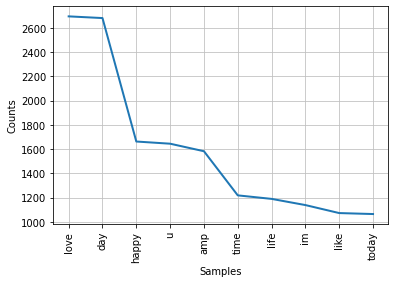

In [138]:
#Get a list of words
text=[]
for a_list in lemma_features:
  text.extend(a_list)

#Find the frequency :
fdist = FreqDist(text)

#Print 10 most common words :
print(fdist.most_common(10))

fdist.plot(10)

Using the code provided in the ICP, we can create a word cloud of the lemmatized, cleaned words with stopwords removed

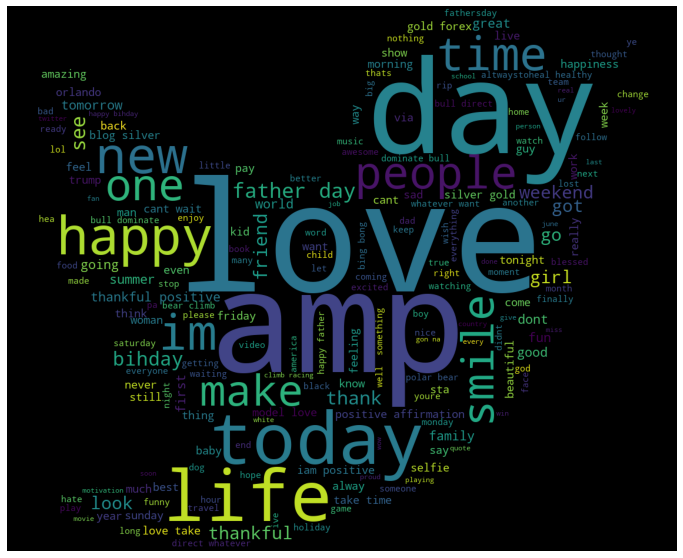

In [139]:
#Library to form wordcloud :
from wordcloud import WordCloud, ImageColorGenerator
import requests
from PIL import Image

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

#Wordcloud needs to generate from 1 string so join our list of words
text_merged = (" ").join(text)

#Generating the wordcloud :
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(text_merged)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

We will now add Part-of-speech tags to the data. Doing this will help distinguish between nouns, verbs, adjectives etc...

In [140]:
tagged_features = []
for tweet in lemma_features:
  tagged_features.append(nltk.pos_tag(tweet))

tagged_features

[[('father', 'RBR'),
  ('dysfunctional', 'JJ'),
  ('selfish', 'JJ'),
  ('drag', 'NN'),
  ('kid', 'NN'),
  ('dysfunction', 'NN'),
  ('run', 'VB')],
 [('thanks', 'NNS'),
  ('lyft', 'VBP'),
  ('credit', 'NN'),
  ('cant', 'NN'),
  ('use', 'NN'),
  ('cause', 'NN'),
  ('dont', 'NN'),
  ('offer', 'VBP'),
  ('wheelchair', 'NN'),
  ('van', 'NN'),
  ('pdx', 'NN'),
  ('disapointed', 'VBD'),
  ('getthanked', 'VBD')],
 [('bihday', 'NN'), ('majesty', 'NN')],
 [('model', 'NN'),
  ('love', 'NN'),
  ('u', 'JJ'),
  ('take', 'VB'),
  ('u', 'JJ'),
  ('time', 'NN')],
 [('factsguide', 'RB'), ('society', 'NN'), ('motivation', 'NN')],
 [('huge', 'JJ'),
  ('fan', 'NN'),
  ('fare', 'NN'),
  ('big', 'JJ'),
  ('talking', 'VBG'),
  ('leave', 'JJ'),
  ('chaos', 'NN'),
  ('pay', 'NN'),
  ('dispute', 'NN'),
  ('get', 'VBP'),
  ('allshowandnogo', 'NN')],
 [('camping', 'VBG'), ('tomorrow', 'NN')],
 [('next', 'JJ'),
  ('school', 'NN'),
  ('year', 'NN'),
  ('year', 'NN'),
  ('cant', 'NN'),
  ('think', 'VBP'),
  ('school'

Finally we want to clean our features by concatenating the word and POS so that it is in this format --> 'word_POS'. Then we want to join all of the sublists so that we can run it through our model

In [141]:
filtered_features = []
for tweet in tagged_features:
  this_sent = []
  for word_pair in tweet:
    this_sent.append(word_pair[0]+"_"+word_pair[1])
  filtered_features.append((" ").join(this_sent))
filtered_features

['father_RBR dysfunctional_JJ selfish_JJ drag_NN kid_NN dysfunction_NN run_VB',
 'thanks_NNS lyft_VBP credit_NN cant_NN use_NN cause_NN dont_NN offer_VBP wheelchair_NN van_NN pdx_NN disapointed_VBD getthanked_VBD',
 'bihday_NN majesty_NN',
 'model_NN love_NN u_JJ take_VB u_JJ time_NN',
 'factsguide_RB society_NN motivation_NN',
 'huge_JJ fan_NN fare_NN big_JJ talking_VBG leave_JJ chaos_NN pay_NN dispute_NN get_VBP allshowandnogo_NN',
 'camping_VBG tomorrow_NN',
 'next_JJ school_NN year_NN year_NN cant_NN think_VBP school_NN exam_NN hate_NN imagine_JJ actorslife_NN revolutionschool_NN girl_NN',
 'love_NN land_NN allin_NN cavs_NN champion_NN cleveland_NN clevelandcavaliers_NNS',
 'welcome_JJ im_NN',
 'ireland_VB consumer_NN price_NN index_NN mom_NN climbed_VBD previous_JJ may_MD blog_VB silver_VB gold_NN forex_NN',
 'selfish_JJ orlando_MD standwithorlando_VB pulseshooting_VBG orlandoshooting_VBG biggerproblems_NNS selfish_JJ heabreaking_VBG value_NN love_NN',
 'get_VB see_NN daddy_JJ tod

We import the model for spliting dataset

In [142]:
import sklearn

from sklearn.model_selection import train_test_split

Lets split the data first
We chose 30% of data for testing and 70% of data for training

In [143]:
X_train, X_test, y_train, y_test = train_test_split(filtered_features,labela, test_size=0.30, random_state=42)

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

We used a sklearn Pipeline by which we actually can create our classifier and TFIDF vectoriser.We dont need the count vectoriser as well.

In [145]:
text_clf=Pipeline(
    [
     ('tfidf',TfidfVectorizer()),
                    ('clf',LinearSVC())
    ]
)

We fit the training dataset

In [146]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

Now we are making predinction

In [147]:
predictions=text_clf.predict(X_test)

Here We are evaluting our model.

In [148]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8905
           1       0.85      0.51      0.64       684

    accuracy                           0.96      9589
   macro avg       0.91      0.75      0.81      9589
weighted avg       0.96      0.96      0.95      9589

[[8845   60]
 [ 333  351]]
0.9590155386380227
